In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('dataset.csv', encoding='euc-kr')

In [7]:
df.columns

Index(['Unnamed: 0', '화재발생일자', '화재발생시간', '시도명', '시군구명', '읍면동명', '읍면동구분명', '번지',
       '도로명', '발화지점', '날씨', '온도', '습도', '특보내용', '발화원인', '발화요인대분류명', '발화요인소분류명',
       '접수일자', '접수시각', '소방서명', '서센터명', '소방지역대명', '출동일자', '출동시각', '현장도착일자',
       '현장도착시각', '출동소요시간\t', '현장소방서거리', '현장안전센터거리', '현장소방지역대거리', '초진일자',
       '초진시각', '전체인력수합계', '완진일자', '완진시간', '화재진압시간', '동원장비수', '인명피해수', '재산피해금액',
       '피해면적'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
from matplotlib import font_manager, rc
font_path = "c:/windows/Fonts/malgun.ttf" #한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

Text(0.5, 1.0, '연도별 산불 발생 현황')

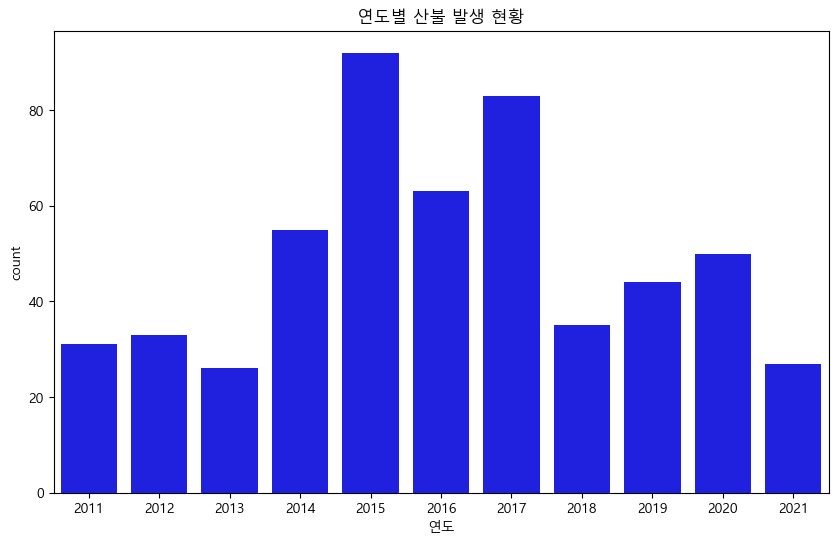

In [10]:
df['화재발생일자'] = pd.to_datetime(df['화재발생일자'], format='%Y%m%d')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['화재발생일자'].dt.year, color='blue')
plt.xlabel('연도')
plt.title('연도별 산불 발생 현황')

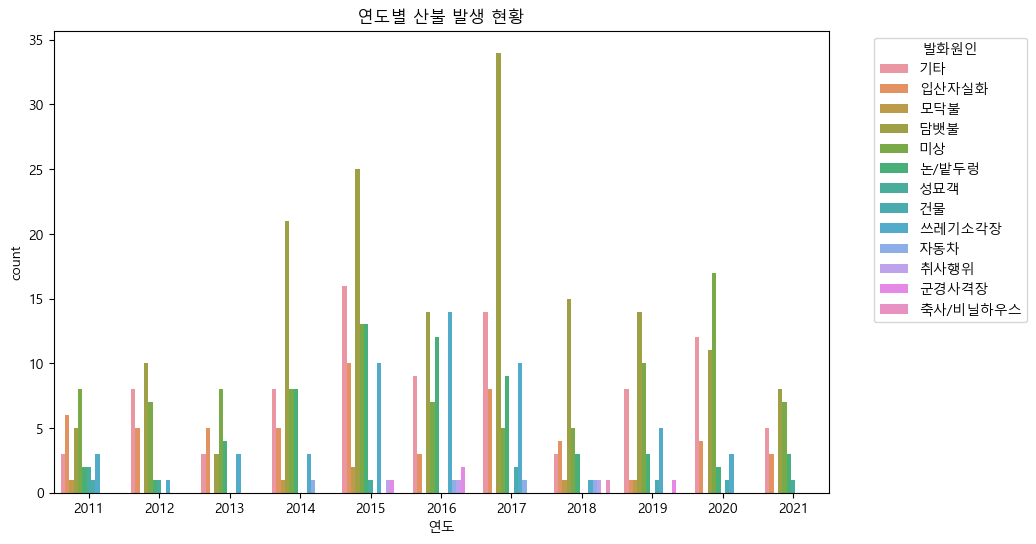

In [11]:
df['화재발생일자'] = pd.to_datetime(df['화재발생일자'], format='%Y%m%d')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['화재발생일자'].dt.year, hue='발화원인')
plt.xlabel('연도')
plt.title('연도별 산불 발생 현황')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='발화원인')

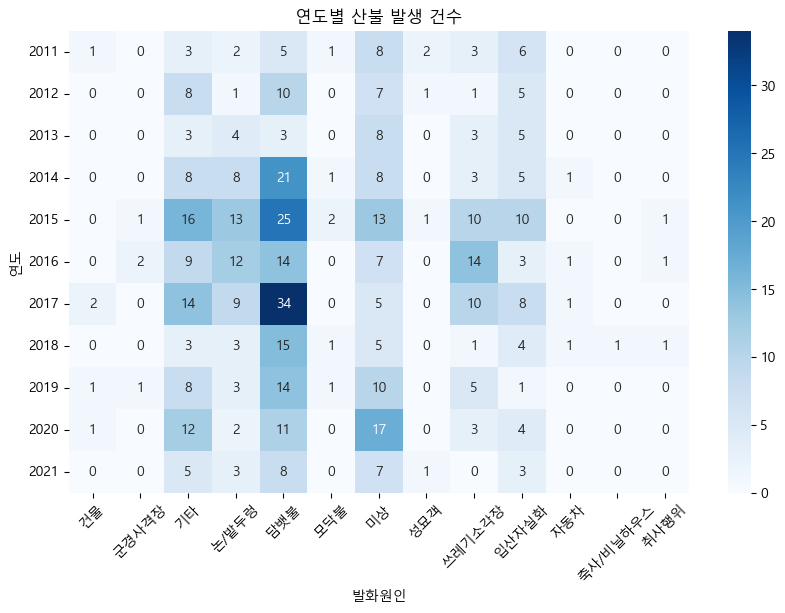

In [12]:
df_year_cause = df.groupby([df['화재발생일자'].dt.year, '발화원인']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(df_year_cause, cmap='Blues', annot=True)
plt.xlabel('발화원인')
plt.ylabel('연도')
plt.title('연도별 산불 발생 건수')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '월별 산불 발생 현황')

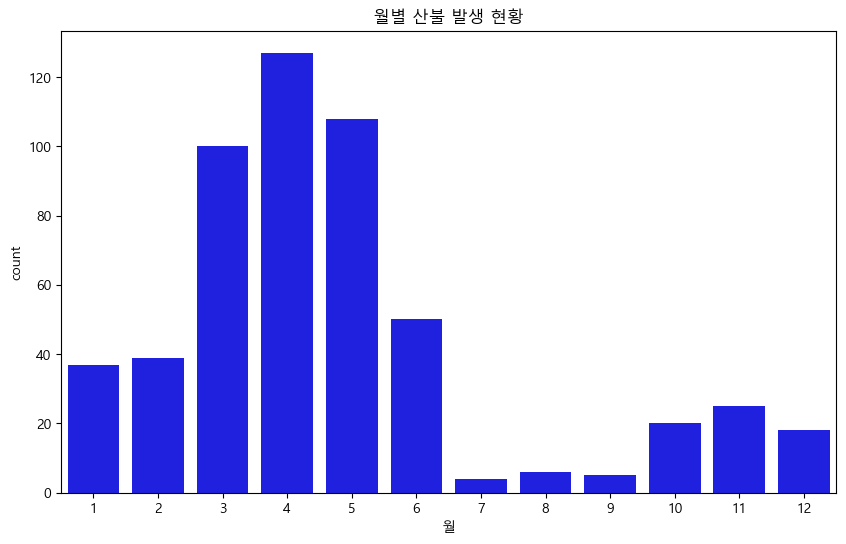

In [13]:
df['화재발생일자'] = pd.to_datetime(df['화재발생일자'], format='%Y%m%d')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['화재발생일자'].dt.month, color='blue')
plt.xlabel('월')
plt.title('월별 산불 발생 현황')

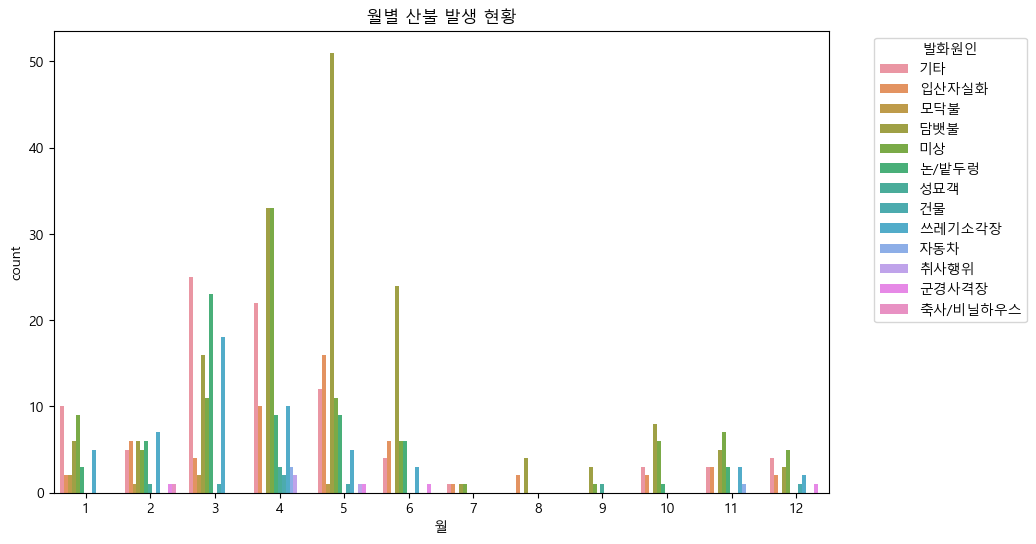

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['화재발생일자'].dt.month, hue='발화원인')
plt.xlabel('월')
plt.title('월별 산불 발생 현황')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='발화원인')

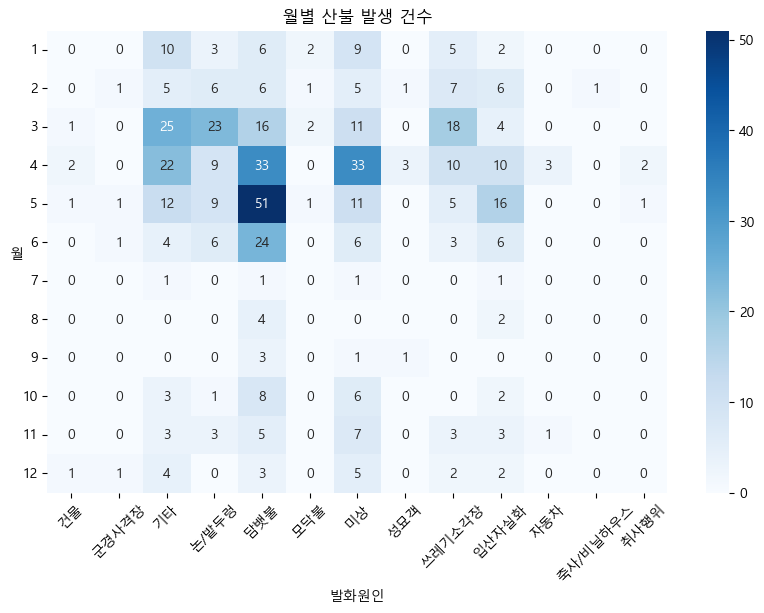

In [15]:
df_month_cause = df.groupby([df['화재발생일자'].dt.month, '발화원인']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(df_month_cause, cmap='Blues',annot=True)
plt.xlabel('발화원인')
plt.ylabel('월', rotation=0)
plt.title('월별 산불 발생 건수')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '요일별 산불 발생 현황')

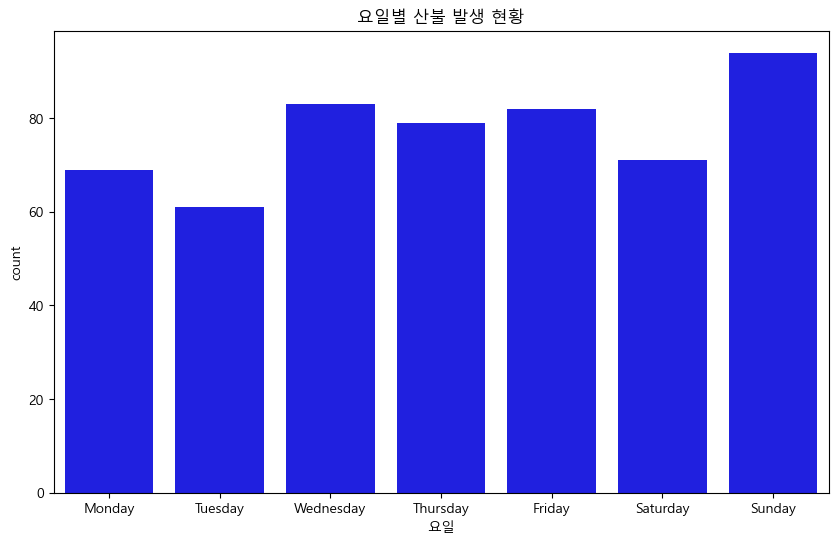

In [16]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['요일'] = pd.Categorical(df['화재발생일자'].dt.day_name(), categories=weekdays, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='요일', color='blue')
plt.xlabel('요일')
plt.title('요일별 산불 발생 현황')

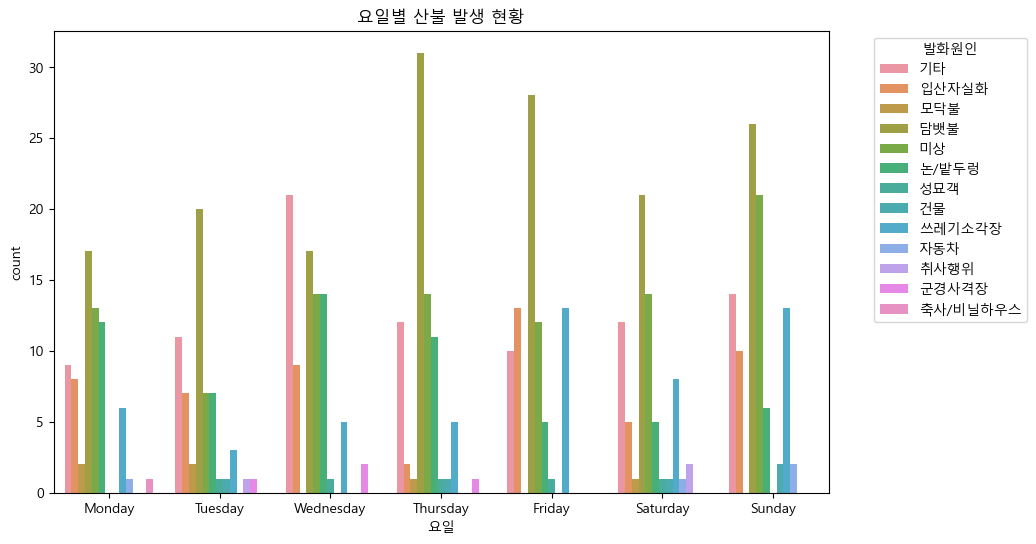

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='요일', hue='발화원인')
plt.xlabel('요일')
plt.title('요일별 산불 발생 현황')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='발화원인')

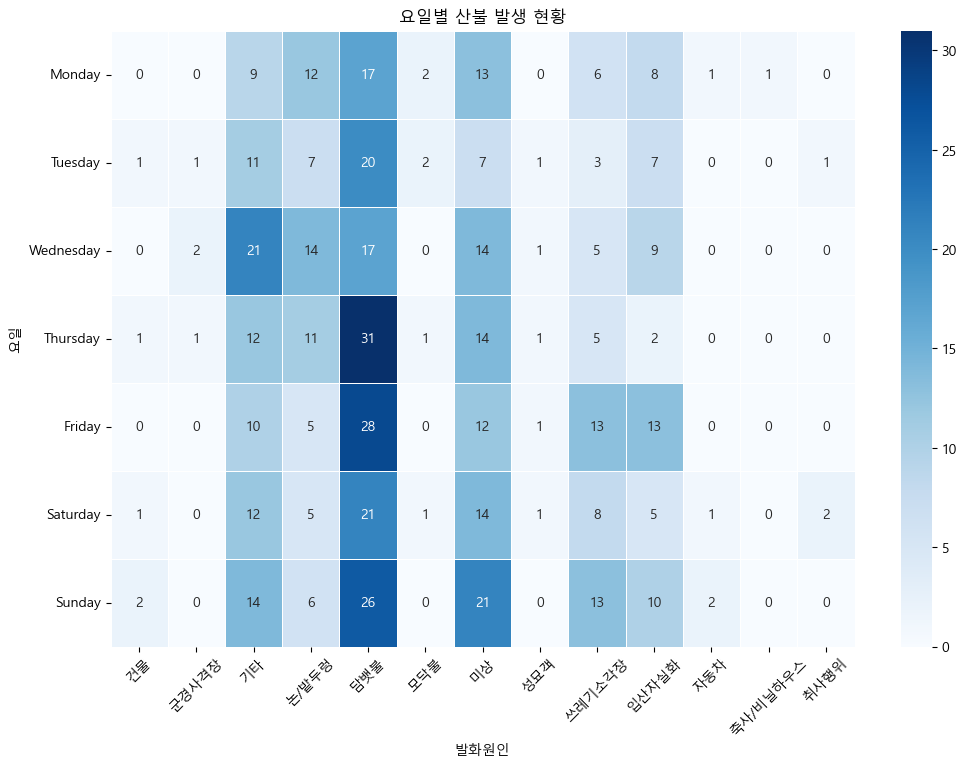

In [18]:
pivot_table = pd.pivot_table(df, index='요일', columns='발화원인', values='화재발생일자', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('요일별 산불 발생 현황')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, '건수')

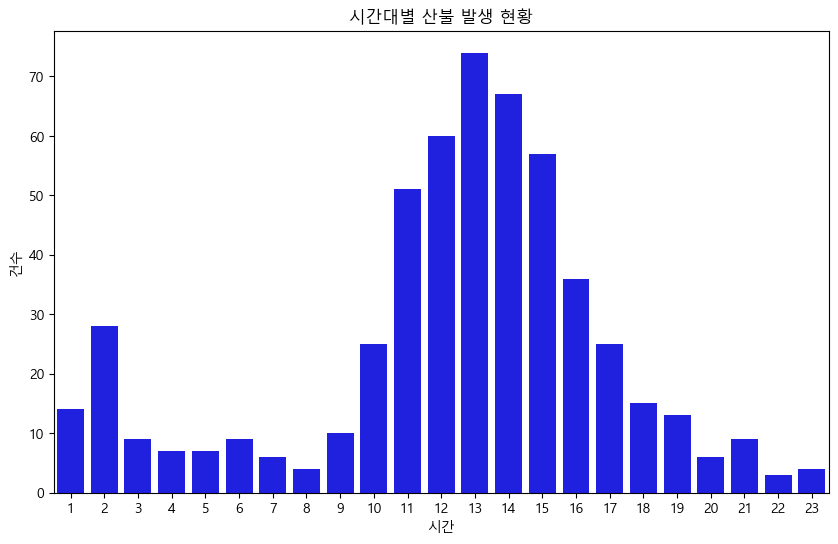

In [19]:
df['hour'] = df['화재발생시간'] // 10000
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', color='blue')
plt.title('시간대별 산불 발생 현황')
plt.xlabel('시간')
plt.ylabel('건수')

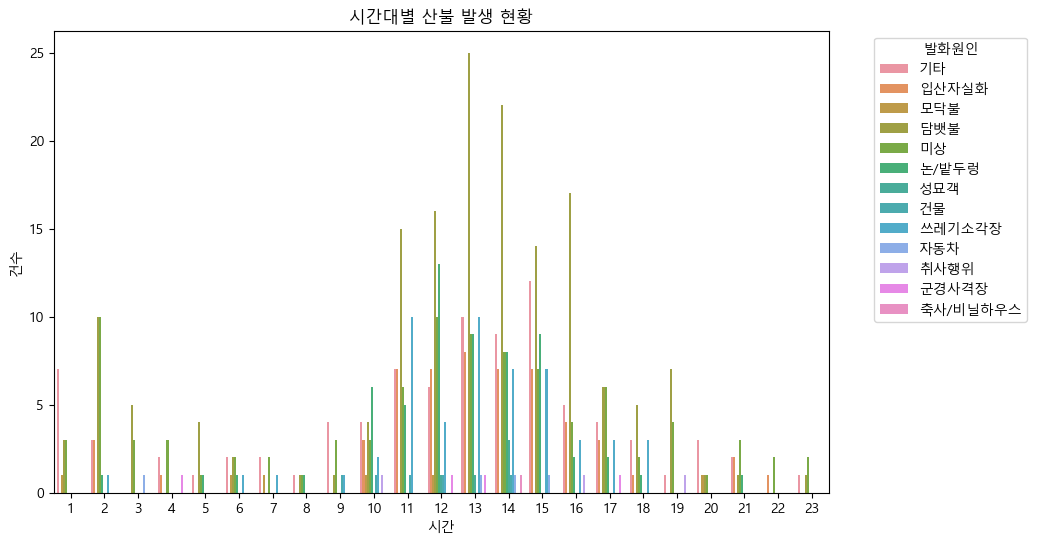

In [20]:
df['hour'] = df['화재발생시간'] // 10000
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', hue='발화원인')
plt.title('시간대별 산불 발생 현황')
plt.xlabel('시간')
plt.ylabel('건수')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='발화원인')

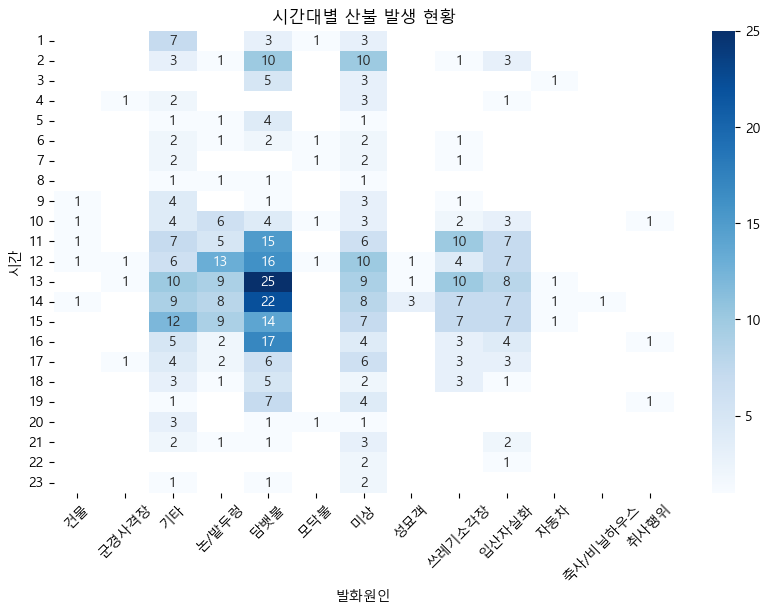

In [21]:
pivot_table = df.pivot_table(index='hour', columns='발화원인', values='화재발생일자', aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, cmap='Blues', annot=True)
plt.title('시간대별 산불 발생 현황')
plt.xlabel('발화원인')
plt.ylabel('시간')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

## 발생지역

In [22]:
# 지도 시각화는 위도, 경도 데이터 필요

Text(0.5, 1.0, '시군구별 산불 발생 현황')

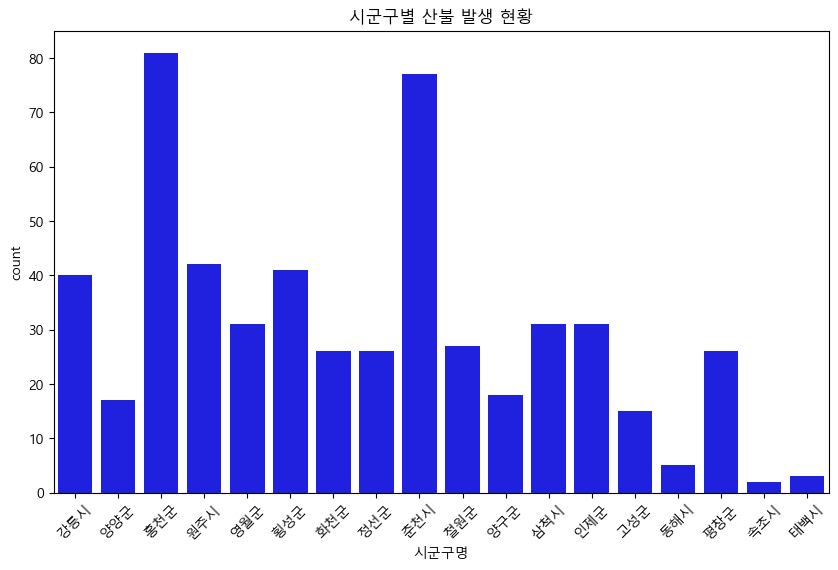

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['시군구명'], color='blue')
plt.xlabel('시군구명')
plt.xticks(rotation=45)
plt.title('시군구별 산불 발생 현황')

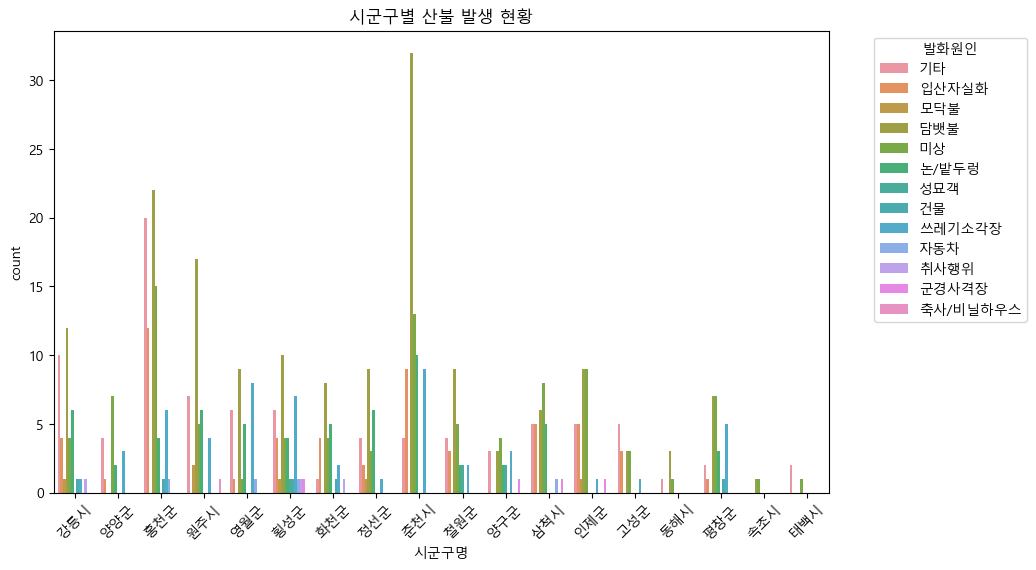

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['시군구명'], hue='발화원인')
plt.xlabel('시군구명')
plt.xticks(rotation=45)
plt.title('시군구별 산불 발생 현황')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='발화원인')

<function matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)>

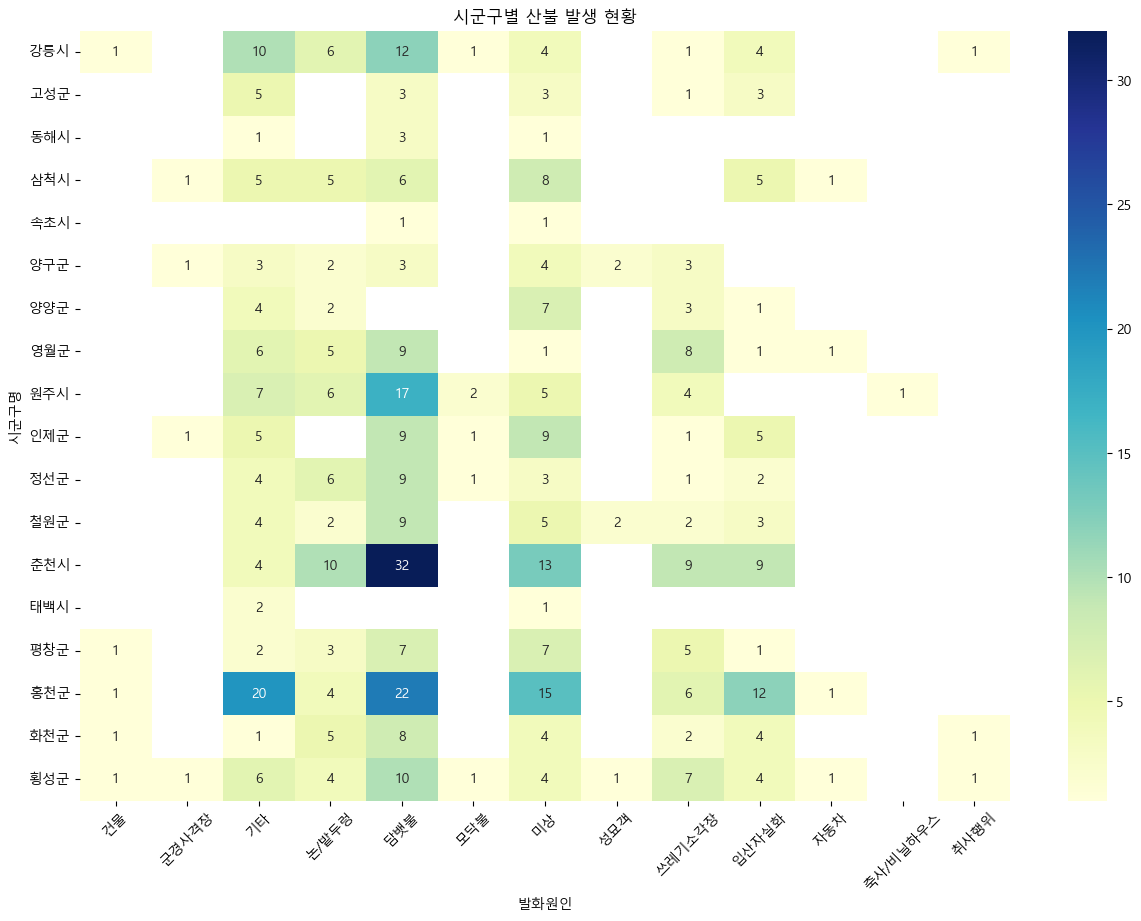

In [25]:
plt.figure(figsize=(15, 10))
df_area_cause = df[['시군구명', '발화원인']].groupby(['시군구명', '발화원인']).size().unstack()
sns.heatmap(df_area_cause, cmap='YlGnBu', annot=True)
plt.title('시군구별 산불 발생 현황')
plt.xlabel('발화원인')
plt.ylabel('시군구명')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.yticks

In [29]:
import pandas as pd
import folium
import json

# Load the shape of the province (Gangwon-do)
geo_path = 'TL_SCCO_SIG_WGS84.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

# Load the wildfire data of each region
data_path = 'dataset.csv'
wildfire_data = pd.read_csv(data_path, encoding='euc-kr')

# Group the data by region and count the number of occurrences
grouped = wildfire_data.groupby('시군구명').size().reset_index(name='발생건수')

# Initialize the map
m = folium.Map(location=[37.619365, 128.479794], tiles='cartodbpositron', zoom_start=9)

# Add the choropleth map
m.choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=grouped,
    columns=['시군구명', '발생건수'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='산불발생건수',
    threshold_scale=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    nan_fill_color='rgba(255, 255, 255, 0)'
)

# Add the layer control
folium.LayerControl().add_to(m)

# Save the map as HTML file and open it in the browser
# m.save('강원도_산불.html')

C:\Users\kimdoyoung\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


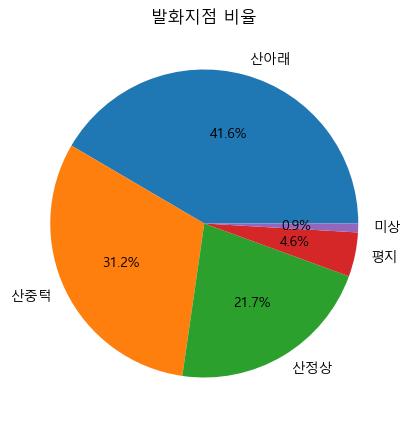

In [30]:
plt.figure(figsize=(5,5))
counts = df['발화지점'].value_counts()
labels = counts.index.tolist()
values = counts.tolist()
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.title('발화지점 비율')
plt.show()

## 기상 데이터

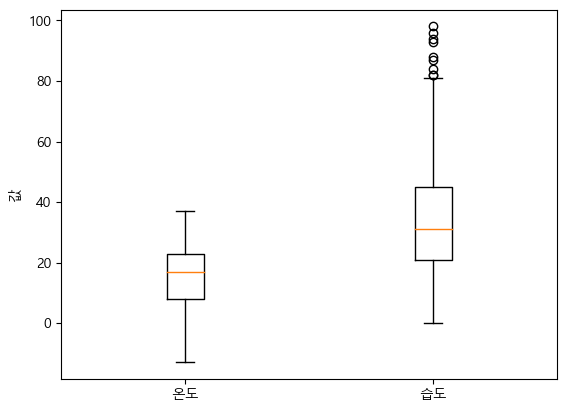

In [31]:
fig, ax = plt.subplots()
ax.boxplot([df['온도'], df['습도']])
ax.set_xticklabels(['온도', '습도'])
ax.set_ylabel('값')

plt.show()

<AxesSubplot:xlabel='온도', ylabel='Count'>

C:\Users\kimdoyoung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


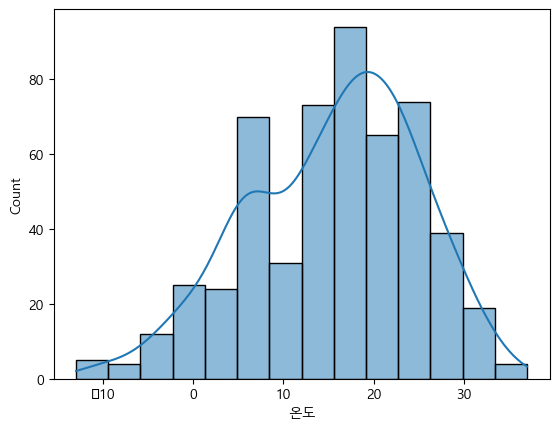

In [32]:
import seaborn as sns
sns.histplot(data=df, x='온도', kde=True)

<AxesSubplot:xlabel='습도', ylabel='Count'>

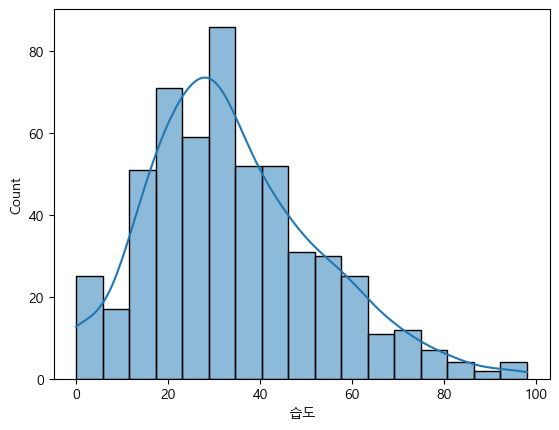

In [33]:
sns.histplot(data=df, x='습도', kde=True)

## 발화원인

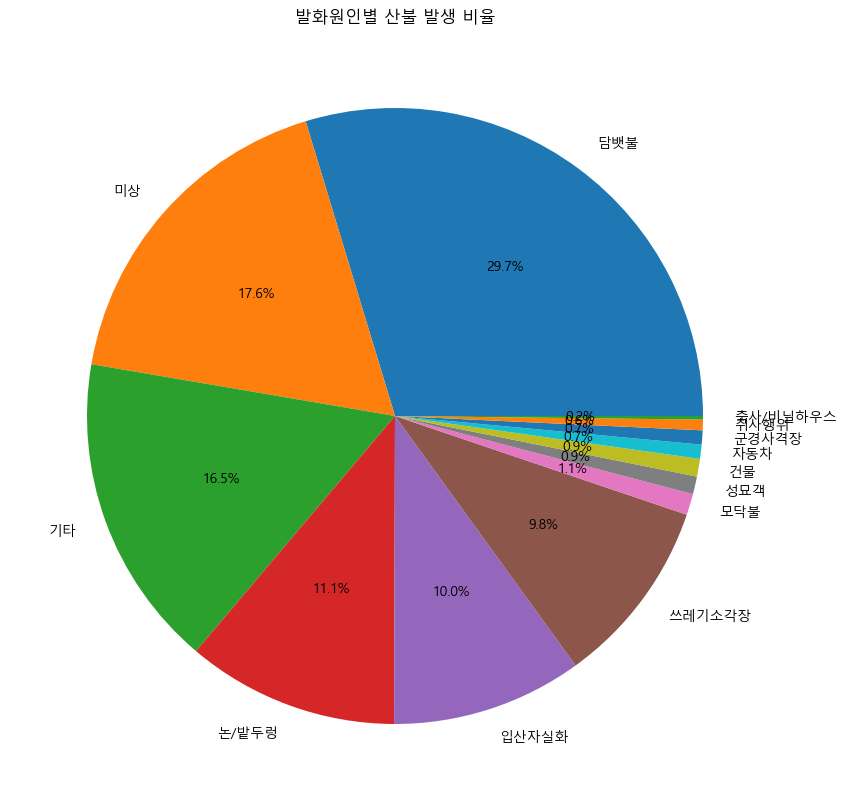

In [34]:
plt.figure(figsize=(15, 10))
df['발화원인'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('발화원인별 산불 발생 비율')
plt.ylabel('')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '기타'),
  Text(1, 0, '입산자실화'),
  Text(2, 0, '모닥불'),
  Text(3, 0, '담뱃불'),
  Text(4, 0, '미상'),
  Text(5, 0, '논/밭두렁'),
  Text(6, 0, '성묘객'),
  Text(7, 0, '건물'),
  Text(8, 0, '쓰레기소각장'),
  Text(9, 0, '자동차'),
  Text(10, 0, '취사행위'),
  Text(11, 0, '군경사격장'),
  Text(12, 0, '축사/비닐하우스')])

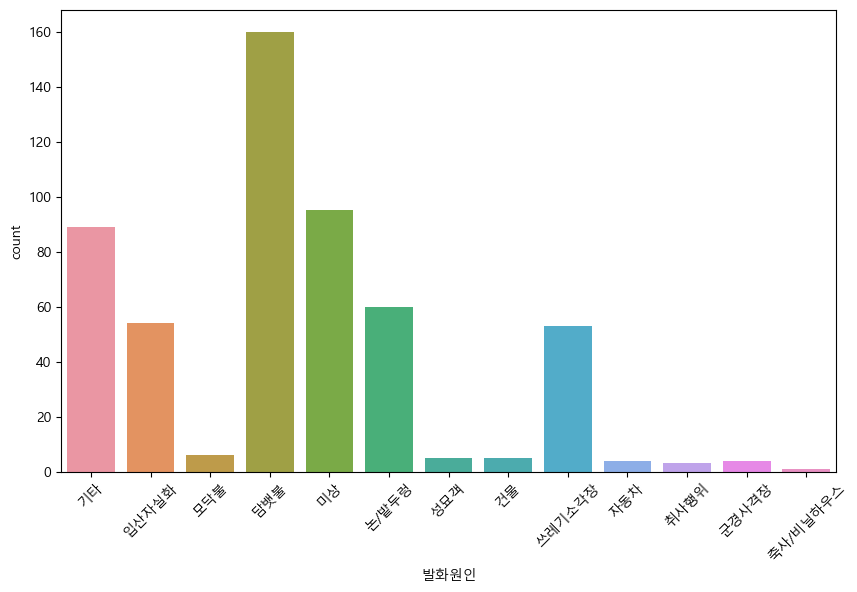

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='발화원인')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '방화의심'),
  Text(1, 0, '부주의'),
  Text(2, 0, '기타'),
  Text(3, 0, '미상'),
  Text(4, 0, '전기적요인'),
  Text(5, 0, '자연적인요인'),
  Text(6, 0, '방화'),
  Text(7, 0, '교통사고'),
  Text(8, 0, '화학적요인'),
  Text(9, 0, '기계적요인')])

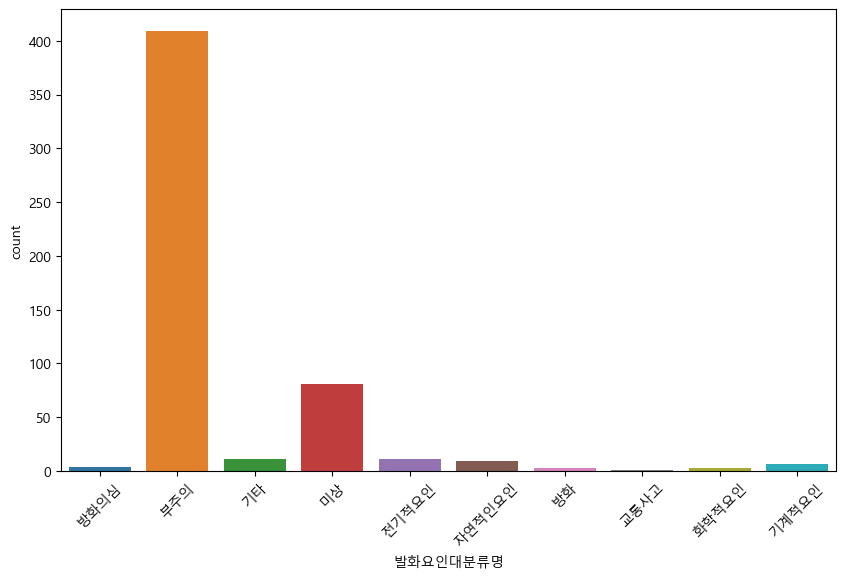

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='발화요인대분류명')
plt.xticks(rotation=45)

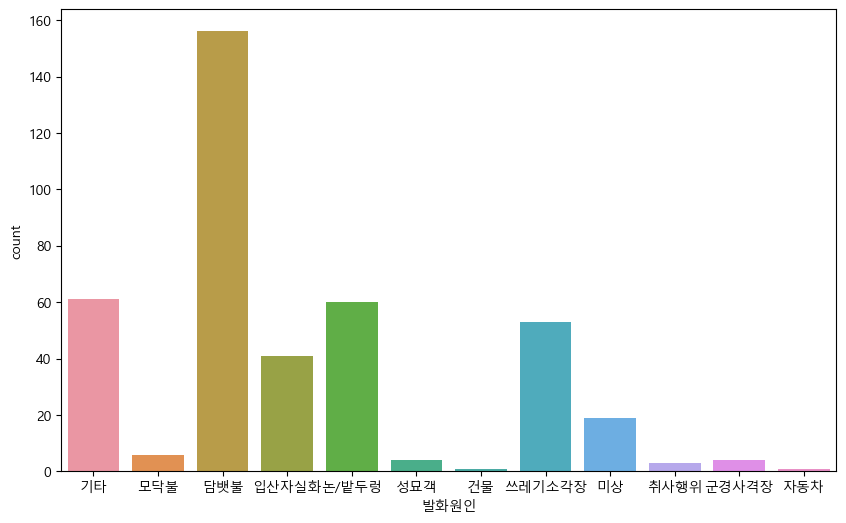

In [37]:
df_sub = df[df['발화요인대분류명'] == '부주의']
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sub, x='발화원인')
plt.show()